# Building the data processing script

In [2]:
import os
get_processed_data_script_file = os.path.join(os.path.pardir, 'src', 'data', 'get_processed_data.py')

In [34]:
%%writefile $get_processed_data_script_file
import numpy as np
import pandas as pd


def read_data():
    # set the path of the raw data
    raw_data_path = os.path.join(os.path.pardir, 'src', 'data', 'raw')
    # print(raw_data_path)
    train_file_path = os.path.join(raw_data_path, 'train.csv')
    test_file_path = os.path.join(raw_data_path, 'test.csv')
    # read the path will all default parameters
    train_df = pd.read_csv(train_file_path, index_col='PassengerId')
    test_df = pd.read_csv(test_file_path, index_col='PassengerId')
    test_df['Survived'] = -888
    df = pd.concat((trains_df, test_df), axis=0)
    return df


def process_data(df):
    #using the method chaining concept
    return (df
            # create title feature - then add this
            .assign(Title = lambda x : x.Name.map(get_title))
            # working with missing values - start with this
            .pipe(fill_missing_values)
            # create fare bin feature
            .assign(Fare_Bin = lambda x : pd.qcut(x.Fare, 4 , labels=['very_low', 'low', 'high', 'very_high']))
            # create features age_state, family_size, is_mother & deck
            .assign(Age_State = lambda x : np.where(x.Age >= 18, 'Adult', 'Child'))
            .assign(Family_Size = lambda x : x.Parch + x.SibSp + 1)
            .assign(Is_Mother = lambda x : np.where(((df.Sex == 'female') & (df.Parch > 0) & (df.Age > 18) & (df.Title != 'Miss')), 1, 0)
            .assign(Cabin = lambda x : np.where(x.Cabin == 'T', np.nan, x.Cabin))
            .assign(Deck = lambda x : x.Cabin.map(get_deck))
            # feature encoding
            .assign(IsMale = np.where(df.Sex == 'male', 1, 0))
            .pipe(pd.get_dummies, columns=['Deck', 'Pclass', 'Title', 'FareBin', 'Embarked', 'AgeState'])
            # add code to drop unnecessary columns
            .drop(['Cabin', 'Name', 'Ticket', 'Parch', 'SibSp', 'Sex'], axis=1)
            # reorder columns
            .pipe(reorder_columns)
           )

def get_title(name):
    title_group = {
        'mr': 'Mr',
        'mrs': 'Mrs',
        'miss': 'Miss',
        'master': 'Master',
        'don': 'Sir',
        'rev': 'Sir',
        'dr': 'Officer',
        'mme': 'Mrs',
        'ms': 'Mrs',
        'major': 'Officer',
        'lady': 'Lady',
        'sir': 'Sir',
        'mlle': 'Miss',
        'col': 'Officer',
        'capt': 'Officer',
        'the countess': 'Lady',
        'jonkheer': 'Sir',
        'dona': 'Lady'
    }
    first_name_title = name.split(',')[1]
    title = first_name_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

def fill_missing_values(df):  
    # replacing missing values
    # embarked
    df.embarked.fillna('C', inplace=True)
    # fare
    median_fare = df[(df.Pclass == 3) & (df.Embarked == 'S')]['Fare'].median()
    df.Fare.fillna(median_fare, inplace=True)
    # age
    title_age_median = df.groupby('Title').Age.transform('median')
    df.Age.fillna(title_age_median, inplace=True)
    return df

def reorder_columns(df):
    columns = [column for column in new_df.columns if column != 'Survived']
    columns = ['Survived'] + columns
    new_df = new_df[columns]
    return df

def get_deck(cabin):
    return np.where(pd.notnull(cabin), str(cabin)[0].upper(), 'Z')      

def write_data(df):
    processed_data_path = os.path.join(os.path.pardir, 'src', 'data', 'processed')
    write_train_path = os.path.join(processed_data_path, 'train.csv')
    write_test_path = os.path.join(processed_data_path, 'test.csv')
    # train_data
    df[df.Survived != -888].to_csv(write_train_path)
    # test
    columns = [column for column in new_df.columns if column != 'Survived']        
    df[df.Survived == -888][columns].to_csv(write_test_path)     

def __name__ == '__main__':
    df = read_data()
    df = process_data(df)
    write_data(df)

Overwriting ../src/data/get_processed_data.py


In [35]:
!python3 $get_processed_data_script_file

  File "../src/data/get_processed_data.py", line 42
    def get_title(name):
    ^
SyntaxError: invalid syntax


In [7]:
# reading processed data
import numpy as np
import pandas as pd
processed_data_path = os.path.join(os.path.pardir, 'src', 'data', 'processed')
write_train_path = os.path.join(processed_data_path, 'train.csv')
write_test_path = os.path.join(processed_data_path, 'test.csv')

In [8]:
train_df = pd.read_csv(write_train_path)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        203 non-null    object 
 11  Embarked     891 non-null    object 
 12  Title        891 non-null    object 
 13  Fare_bin     891 non-null    object 
 14  AgeState     891 non-null    object 
 15  FamilySize   891 non-null    int64  
 16  IsMother     891 non-null    int64  
 17  Deck         891 non-null    object 
 18  IsMale       891 non-null    int64  
dtypes: float

In [9]:
test_df = pd.read_csv(write_test_path)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Title        418 non-null    object 
 12  Fare_bin     418 non-null    object 
 13  AgeState     418 non-null    object 
 14  FamilySize   418 non-null    int64  
 15  IsMother     418 non-null    int64  
 16  Deck         418 non-null    object 
 17  IsMale       418 non-null    int64  
dtypes: float64(2), int64(7), object(9)
memory usage: 5

# Advanced Visualization using MatplotLib

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# merge both dfs
df = pd.concat((train_df, test_df), axis=0)

(array([ 80.,  62., 324., 426., 189., 108.,  66.,  41.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <BarContainer object of 10 artists>)

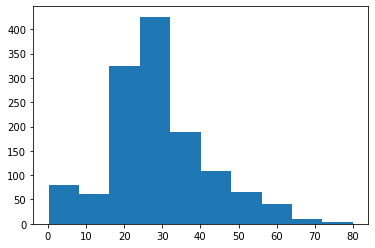

In [13]:
plt.hist(df.Age)

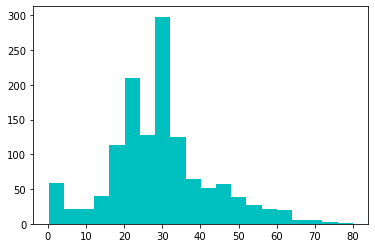

In [14]:
plt.hist(df.Age, bins=20, color='c')
plt.show()

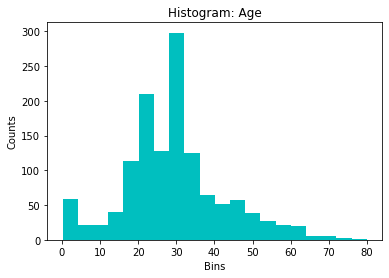

In [15]:
plt.hist(df.Age, bins=20, color='c')
plt.title('Histogram: Age')
plt.xlabel('Bins')
plt.ylabel('Counts')
plt.show()

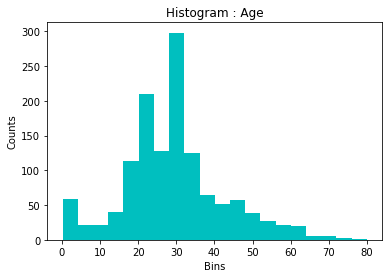

In [16]:
f, ax = plt.subplots()
ax.hist(df.Age, bins=20, color='c')
ax.set_title('Histogram : Age')
ax.set_xlabel('Bins')
ax.set_ylabel('Counts')
plt.show()

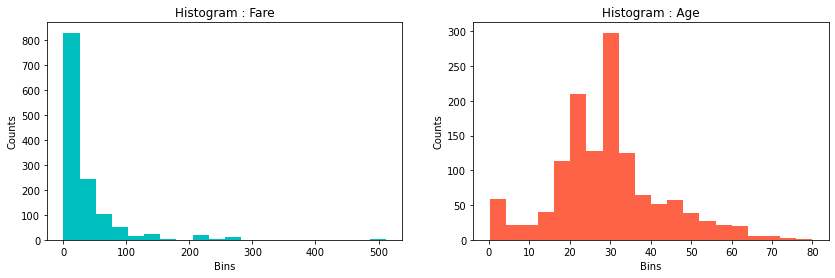

In [18]:
# Add subplots 
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
ax1.hist(df.Fare, bins=20, color='c')
ax1.set_title('Histogram : Fare')
ax1.set_xlabel('Bins')
ax1.set_ylabel('Counts')

ax2.hist(df.Age, bins=20, color='tomato')
ax2.set_title('Histogram : Age')
ax2.set_xlabel('Bins')
ax2.set_ylabel('Counts')
plt.show()

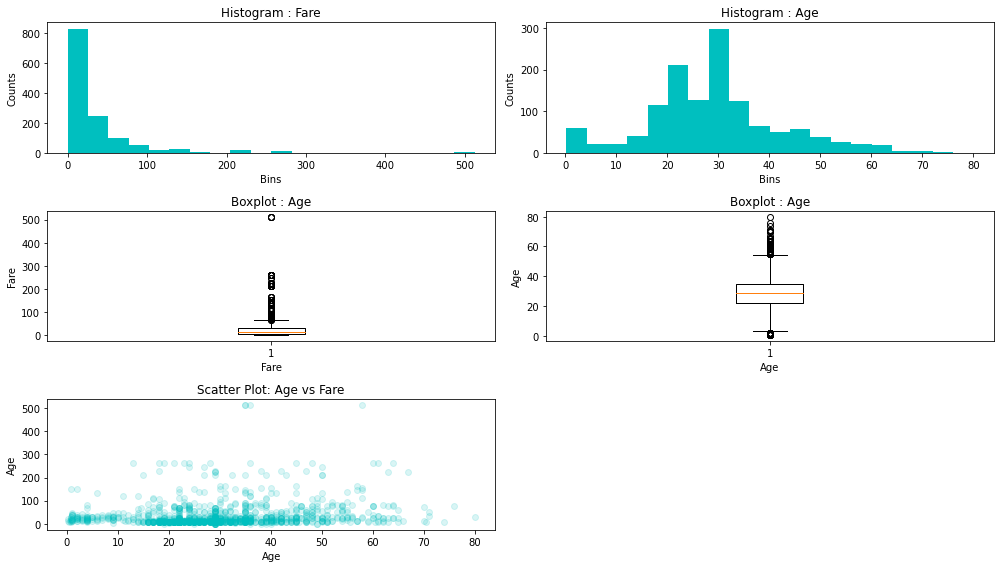

In [23]:
# Adding more subplots
f , ax_arr = plt.subplots(3, 2, figsize=(14,8))

# Plot 1
ax_arr[0,0].hist(df.Fare, bins=20, color='c')
ax_arr[0,0].set_title('Histogram : Fare')
ax_arr[0,0].set_xlabel('Bins')
ax_arr[0,0].set_ylabel('Counts')

# Plot 2
ax_arr[0,1].hist(df.Age, bins=20, color='c')
ax_arr[0,1].set_title('Histogram : Age')
ax_arr[0,1].set_xlabel('Bins')
ax_arr[0,1].set_ylabel('Counts')

# Plot 3
ax_arr[1,0].boxplot(df.Fare.values)
ax_arr[1,0].set_title('Boxplot : Age')
ax_arr[1,0].set_xlabel('Fare')
ax_arr[1,0].set_ylabel('Fare')

# Plot 4
ax_arr[1,1].boxplot(df.Age.values)
ax_arr[1,1].set_title('Boxplot : Age')
ax_arr[1,1].set_xlabel('Age')
ax_arr[1,1].set_ylabel('Age')

# Plot 5
ax_arr[2,0].scatter(df.Age, df.Fare, color='c', alpha=0.15)
ax_arr[2,0].set_title('Scatter Plot: Age vs Fare')
ax_arr[2,0].set_xlabel('Age')
ax_arr[2,0].set_ylabel('Age')

ax_arr[2,1].axis('off')

plt.tight_layout()
plt.show()